# Entropies and Dimensions

[original code](https://github.com/JuliaDynamics/JuliaDynamics/blob/master/tutorials/Youtube_JuliaLang_tutorial/4.%20Entropies%20and%20Dimensions.ipynb)

[video tutorial](https://www.youtube.com/watch?v=A8g9rdEfdNg)

A. Generalized entropy

B. Specialized Histogram

C. Generalized Dimension

D. Automated Dimension estimation

E. Confirming Takens theorem

# A. Generalized entropy

* In the study of dynamcal systems there are man quantities that identify as entropy.  These quantitieis are not the more commonly knpwn thermodynamocal ones used in statistical physca.

* Tese entropies are from INformation theory which represent infomation contained in a dataset. 

* Ingenerarl teh more uncertain or random the dataset is, th larger the entropy will be

let $p$ be an array of probabilities such that it sums upto 1. Then the generaliyed entropy is defiend as 

$$ H_{\alpha }(p) = \frac{1}{1-\alpha}\log(\sum _{i}p[i]^\alpha)  $$

and is alo called as Renyi entropy. Other enrtopies like the Shanon entropy are generaized by it sincel limit $\alpha$  --> 1 the Renyi entropy becomes th Shanon entropy

The Renyi entropy can be computed for a specific dataset given $p$. But how does one get $p$ ?
* $p$  representas the probability that a point of a datset falls into a specific bin
* It si nothing more that the normalized histogram of the dataset


In [1]:
using DynamicalSystems, Plots

In [2]:
N = 100000
randomdata = Dataset(rand(N,3))

3-dimensional Dataset{Float64} with 100000 points
 0.40227    0.459673   0.375487
 0.145254   0.760434   0.388106
 0.12252    0.852774   0.322717
 0.830673   0.492132   0.125242
 0.188533   0.326357   0.478322
 0.223585   0.435272   0.844664
 0.0104505  0.240154   0.44212
 0.137715   0.0292618  0.874803
 0.657002   0.683532   0.543954
 0.786005   0.0245473  0.558568
 0.194048   0.118685   0.189347
 0.596169   0.989562   0.741927
 0.148829   0.831624   0.353962
 ⋮                     
 0.903712   0.881891   0.342245
 0.650265   0.660545   0.728292
 0.552819   0.518149   0.67909
 0.559633   0.811155   0.71311
 0.213449   0.950605   0.252233
 0.163463   0.56544    0.153025
 0.808721   0.0406953  0.383422
 0.311994   0.28812    0.41573
 0.858964   0.152973   0.121213
 0.530451   0.376082   0.942053
 0.151998   0.236764   0.474506
 0.771513   0.97414    0.807473

Teh call signature  we need is 

`genentropy(α, ε, dataset::AbstractDataset; base = e)`
* This functionn calculates teh generalized entropy or order \alpha
* It first calculates teh probability $p$ 
* The histogram is created by partitioning the dataset into boxes of size $\varepsilon$ 

In [3]:
?genentropy()

```
genentropy(α, ε::Real, dataset::AbstractDataset; base = e)
```

Compute the `α` order generalized (Rényi) entropy[^Rényi1960] of a dataset, by first partitioning it into boxes of length `ε` using [`non0hist`](@ref).

```
genentropy(α, εs::AbstractVector, dataset::AbstractDataset; base = e)
```

Same as `[genentropy(α, ε, dataset) for ε in εs]`.

```
genentropy(α, p::AbstractArray; base = e)
```

Compute the entropy of an array of probabilities `p`, assuming that `p` is sum-normalized.

Optionally use `base` for the logarithms.

## Description

Let $p$ be an array of probabilities (summing to 1). Then the Rényi entropy is

$$
H_\alpha(p) = \frac{1}{1-\alpha} \log \left(\sum_i p[i]^\alpha\right)
$$

and generalizes other known entropies, like e.g. the information entropy ($\alpha = 1$, see [^Shannon1948]), the maximum entropy ($\alpha=0$, also known as Hartley entropy), or the correlation entropy ($\alpha = 2$, also known as collision entropy).

[^Rényi1960]: A. Rényi, *Proceedings of the fourth Berkeley Symposium on Mathematics, Statistics and Probability*, pp 547 (1960)

[^Shannon1948]: C. E. Shannon, Bell Systems Technical Journal **27**, pp 379 (1948)


In [5]:
genentropy(2, 0.01,randomdata)

11.41632520858095

In [6]:
genentropy(2, 0.1,randomdata)

6.897366826296576

In [7]:
for i in [0.1, 0.01, 0.001, 0.0001]
    println(genentropy(2, i, randomdata))
end

6.897366826296576
11.41632520858095
11.512785474768334
11.512925464969248


Note that the output of `genentropy` changed with changing the $\varepsilon$ untill we hit $\varepsilon$=0.001. 

We will now find the geentropy of dynamical systems

### genentropy for Towel system

In [8]:
# get prelodaded dynamical system
towel = Systems.towel()

3-dimensional discrete dynamical system
 state:       [0.085, -0.121, 0.075]
 e.o.m.:      eom_towel
 in-place?    false
 jacobian:    jacob_towel
 parameters:  nothing

In [9]:
N

100000

In [11]:
tr = trajectory(towel, N-1)
summary(tr)

"3-dimensional Dataset{Float64} with 100000 points"

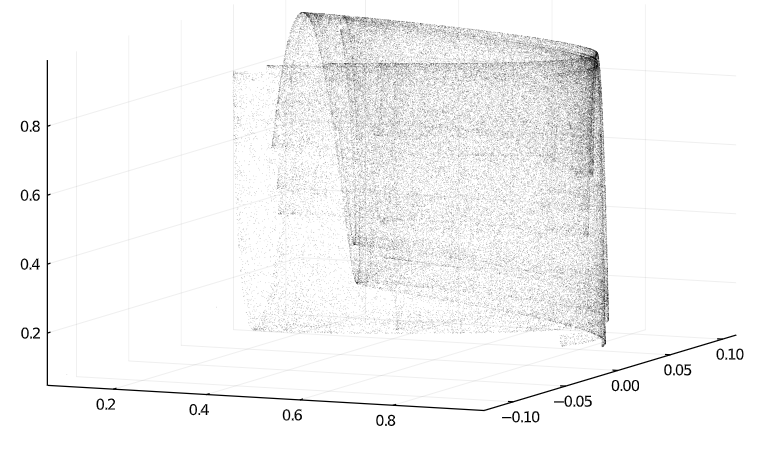

and now we caicluate the entropy

In [19]:
for i in [0.1, 0.01, 0.001, 0.0001]
    println(genentropy(2, i , tr))
end

4.47371511993848
9.011863353592458
11.439377649674253
11.512165753623009


# B. Specialized histogam

* Paritioning teh dataset (generating a histogram) is in general a costly operation that depends exponentially on teh number of dimensions.
* In this specific application however, we can tremendously reduce the memory allocation and time spent

To get the array of probabilities $p$ for size $\varepsilon$ from teh trajetory of teh towel map we use the function `non0hist`

In [20]:
?non0hist

search: non0hist



```
non0hist(ε, dataset::AbstractDataset) → p
```

Partition a dataset into tabulated intervals (boxes) of size `ε` and return the sum-normalized histogram in an unordered 1D form, discarding all zero elements and bin edge information.

## Performances Notes

This method has a linearithmic time complexity (`n log(n)` for `n = length(data)`) and a linear space complexity (`l` for `l = dimension(data)`). This allows computation of histograms of high-dimensional datasets and with small box sizes `ε` without memory overflow and with maximum performance.

Use [`binhist`](@ref) to retain bin edge information.


In [21]:
ε = 0.01
p = non0hist(ε, tr)

19407-element Array{Float64,1}:
 1.0e-5
 1.0e-5
 3.0e-5
 0.00033
 0.00022
 0.0002
 0.00017
 0.00013
 7.0e-5
 0.00011
 7.0e-5
 0.00015
 0.00019
 ⋮
 2.0e-5
 1.0e-5
 3.0e-5
 4.0e-5
 5.0e-5
 4.0e-5
 2.0e-5
 3.0e-5
 4.0e-5
 5.0e-5
 1.0e-5
 1.0e-5

In [22]:
sum(p)

1.0000000000000002

# C. generalized dimension

* There are numurous meethods that one can use to calculate the dimension of a dataset for exmple Fractal Dimension
* Most of the times these dimensions indicate some kind of scalling behavior
* For example the scaling of `genentropy` with decreasing $\varepsilon$ givrs the so called generalized diension

$$ E \approx -D\log(\varepsilon) $$ with $E$ the entroy anf the dimension $D$

### generalized dimension for attractor of the Towel map

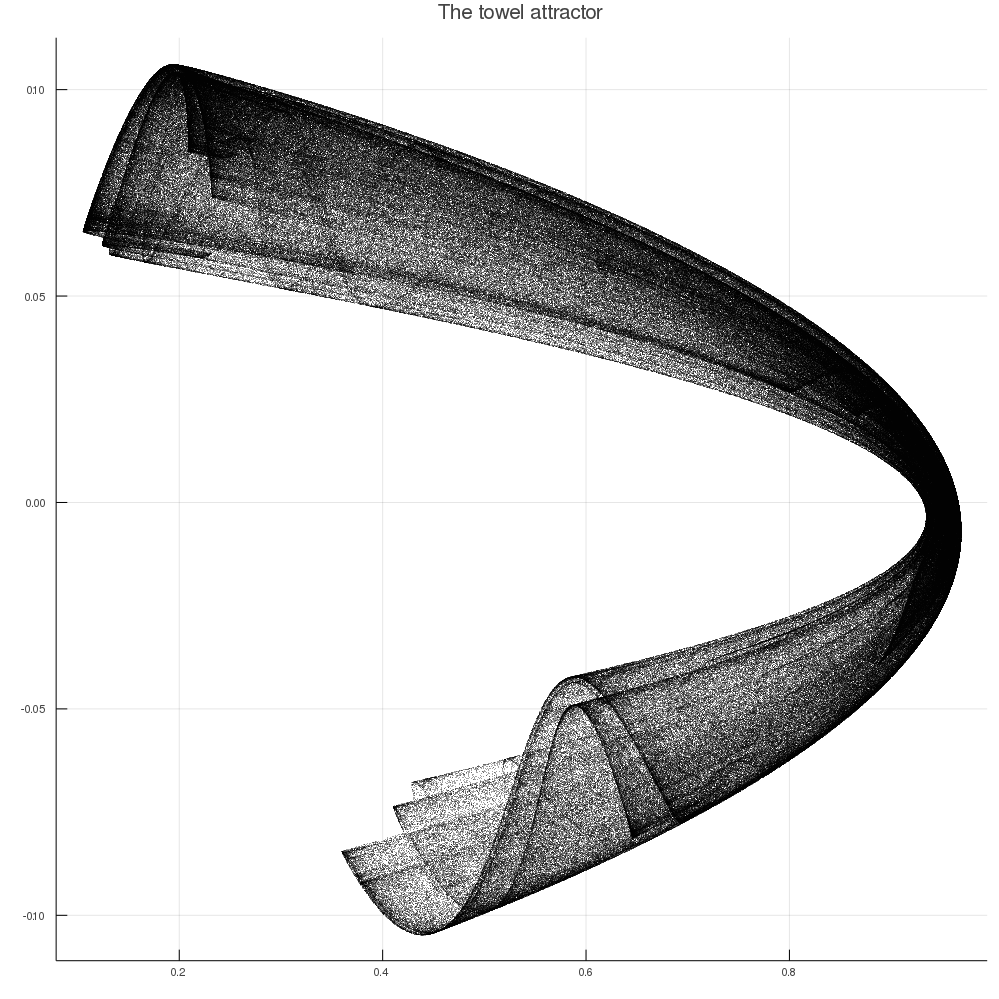

which $\varepsilon$ should we use to find the `genentropy`?

Now we will compute `genentropy` for different $\varepsilon$ .

#### calculate Dimension and genentropy from random box size $\varepsilon$

let us start with random $\varepsilon$

In [34]:
ες = 10.0.^range(-4, stop=1, length=12)

12-element Array{Float64,1}:
  0.0001
  0.0002848035868435802
  0.0008111308307896872
  0.0023101297000831605
  0.006579332246575682
  0.01873817422860384
  0.0533669923120631
  0.15199110829529336
  0.43287612810830584
  1.2328467394420661
  3.511191734215131
 10.0

In [35]:
Es = zero(ες)
for (i, ε) ∈ enumerate(ες)
    Es[i] = genentropy(1, ε, towel_tr)
end
Es

12-element Array{Float64,1}:
 11.512450266741288
 11.508828405676086
 11.480584853288617
 11.264996206611524
 10.217947241817901
  8.207870073227646
  5.97972083908344
  3.74646134048011
  1.2943890482095242
 -0.0
 -0.0
 -0.0

we will now plot the generalized entropies for different ε values

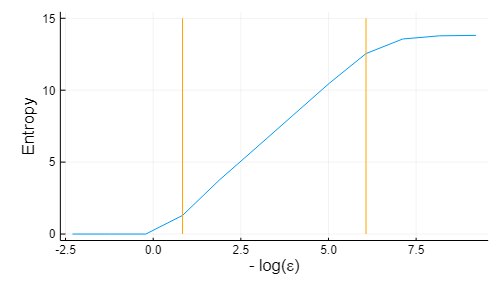

At the limit of very large $\varepsilon$ all points are in same bin, and the entrpy reached a miminum of 0. At teh limit of vaery small $\varepsilon$  every point gets its own bin and the entropy reached maximum of $log(N)$ where $N$ is the number of points. In the middle there is some linear region where this scalling behaviour holds. 

Above  image shows that the scalling behaviour holds between the orange vertical lines. 

Let us manually coose the curve points that fall in teh liniar regime of the above plot

In [39]:
x, y = -log.(ες)[4:end-2], Es[4:end-2]

([6.070451608802483, 5.023822021077917, 3.9771924333533515, 2.9305628456287853, 1.8839332579042192, 0.837303670179653, -0.20932591754491323], [11.264996206611524, 10.217947241817901, 8.207870073227646, 5.97972083908344, 3.74646134048011, 1.2943890482095242, -0.0])

and find th slope of the curve to calculate the dimension $D$

In [41]:
using ChaosTools

we will fit a linear model for this data

In [42]:
offset, slope = ChaosTools.linreg(x,y)

(0.20556073308156275, 1.914427933988265)

In [43]:
D = slope

1.914427933988265

This is the dimension of the henon attractor we calcualted.

The information dimension of the towel map is around 2. Our results are pretty close to that

#### calculate Dimension and genentropy from function in `Dynamicalsystem.jl`

In [44]:
?estimate_boxsizes()

```
estimate_boxsizes(data::AbstractDataset; k::Int = 12, z = -1, w = 1)
```

Return `k` exponentially spaced values: `10 .^ range(lower+w, upper+z, length = k)`.

`lower` is the magnitude of the minimum pair-wise distance between datapoints while `upper` is the magnitude of the maximum difference between greatest and smallest number among each timeseries.

"Magnitude" here stands for order of magnitude, i.e. `round(log10(x))`.


In [45]:
ες = estimate_boxsizes(towel_tr)

┌ Warning: Boxsizes limits do not differ by 2 orders of magnitude or more. Setting `w -= 0.5; z += 0.5`. Please adjust keywords or provide a bigger dataset.
└ @ ChaosTools /nethome/n.kusampudi/.julia/packages/ChaosTools/IBGfK/src/dimensions/dims.jl:157


12-element Array{Float64,1}:
 0.00031622776601683794
 0.000592553097554568
 0.0011103363181676378
 0.0020805675382171715
 0.003898603702549072
 0.007305271542664456
 0.013688745095370812
 0.025650209056800457
 0.04806380863064391
 0.09006280202112786
 0.16876124757881478
 0.31622776601683794

get entropy of towel map for each value of the box sizes in above array 

In [46]:
Es = genentropy.(1, ες, Ref(towel_tr))

12-element Array{Float64,1}:
 11.508121402621965
 11.495977793831678
 11.451969493200874
 11.307723772950036
 10.897556019149794
 10.041937009853196
  8.851379260086127
  7.569734323810116
  6.243117004977471
  5.091292665993174
  3.4626965179379408
  2.1506150342475086

we will now again plot the entropy vs the log of box sizes

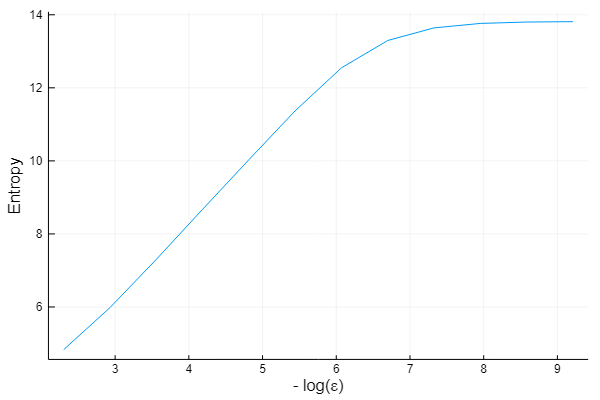

In [49]:
x, y = -log.(ες)[4:end-2], Es[4:end-2]

([6.175114567574941, 5.547136814940201, 4.919159062305461, 4.291181309670721, 3.6632035570359816, 3.035225804401242, 2.4072480517665023], [11.307723772950036, 10.897556019149794, 10.041937009853196, 8.851379260086127, 7.569734323810116, 6.243117004977471, 5.091292665993174])

In [50]:
offset, slope = ChaosTools.linreg(x,y)

(1.145359678083853, 1.730633080754898)

In [51]:
D = slope

1.730633080754898

# D. Automated Dimension estimation

Given the arbitrary plot like the one above is there any algorithem to deduce a scalling region ?

The function `linear_regions` decomposes the function into regions where tje function is linear. It retursn the indices of x that correspond to the linear region and the approximated tangentsat each region

In [53]:
ες

12-element Array{Float64,1}:
 0.00031622776601683794
 0.000592553097554568
 0.0011103363181676378
 0.0020805675382171715
 0.003898603702549072
 0.007305271542664456
 0.013688745095370812
 0.025650209056800457
 0.04806380863064391
 0.09006280202112786
 0.16876124757881478
 0.31622776601683794

In [54]:
xs = -log.(ες)
lrs, slopes = linear_regions(xs, Es)

([1, 2, 3, 4, 5, 6, 10, 12], [0.01933764172271686, 0.07007939444695727, 0.2296987745913637, 0.6531565044770198, 1.3624989192798118, 1.8958597574069662, 2.59339784128069])

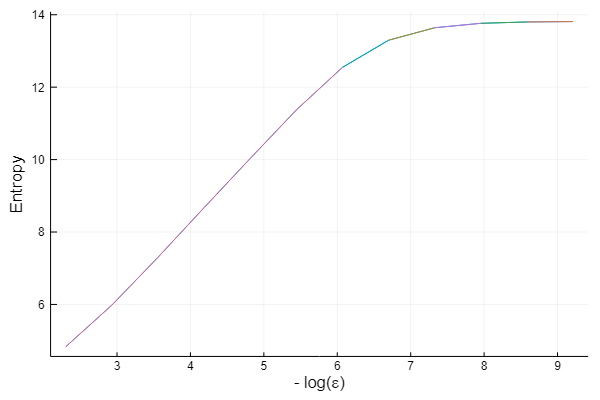

The linear region which is the biggest is the "probably correct one" . The function `linear_region` estimates it slope

In [57]:
linear_region(xs, Es)

([6, 10], 1.99203728003798)

### `generalized_dim` function

let us summarise wht we just did to estimate the dimension of an attractor.

1. We decided on some partition sizes ες 
2. For each ε (box size) in ες we calculated the entropy via `genentropy`. We stored these entropy as array Es.
3. We tried to find a **linear scalling region** of the curve Es vs -log.(ες)
4. The slope of this **Linear scalling region** is the dimension we estimated

Wecan call a single function  `generalized_dim()`to do all the above steps. which computes the α-order generalized dimension.

In [58]:
?generalized_dim

search: generalized_dim GeneralizedEmbedding



```
generalized_dim(α, dataset [, sizes]) -> D_α
```

Return the `α` order generalized dimension of the `dataset`, by calculating the [`genentropy`](@ref) for each `ε ∈ sizes`.

## Description

The returned dimension is approximated by the (inverse) power law exponent of the scaling of the [`genentropy`](@ref) versus the box size `ε`, where `ε ∈ sizes`.

Calling this function performs a lot of automated steps:

1. A vector of box sizes is decided by calling `sizes = estimate_boxsizes(dataset)`, if `sizes` is not given.
2. For each element of `sizes` the appropriate entropy is calculated, through `d = genentropy.(α, sizes, dataset)`. Let `x = -log.(sizes)`.
3. The curve `d(x)` is decomposed into linear regions, using [`linear_regions`](@ref)`(x, d)`.
4. The biggest linear region is chosen, and a fit for the slope of that region is performed using the function [`linear_region`](@ref). This slope is the return value of `generalized_dim`.

By doing these steps one by one yourself, you can adjust the keyword arguments given to each of these function calls, refining the accuracy of the result.

The following aliases are provided:

  * α = 0 : `boxcounting_dim`, `capacity_dim`
  * α = 1 : `information_dim`


#### `generalized_dim` for Towel map

In [60]:
towel = Systems.towel()
tr = trajectory(towel, 200000)
generalized_dim(0, tr)

2.108144686541214

#### `generalized_dim` for Henon map#### 

In [61]:
henon = Systems.henon()
tr = trajectory(henon, 200000)
generalized_dim(0, tr)

1.2192730981829056

#### Note!! The function `generalized_dim` is a crudeestimate.

You must check and double check if you want more accuracy

# E. Confirming Takens Theorem

Recalling from the notebook 3, we discussed delay embeddings and how Takens theorem states that quantities like e.g. the attractor dimension remain the same between reconstructed and orginal systems.

We can now show this numerically. We will start with a trajectory from the system we used in notebook 3

In [62]:
#get gissinger dynamical system
g = Systems.gissinger(ones(3))

3-dimensional continuous dynamical system
 state:       [1.0, 1.0, 1.0]
 e.o.m.:      gissinger_eom
 in-place?    false
 jacobian:    gissinger_jacob
 parameters:  [0.119, 0.1, 0.9]

In [63]:
#get trajectory for gissinger system
dt = 0.05
data = trajectory(g, 20000.0, dt=dt, ttr=100.0)
summary(data)

"3-dimensional Dataset{Float64} with 400001 points"

In [64]:
#estimte first delaytime using first minimum of mutual information
τ = estimate_delay(data[:,1], "mi_min")

48

In [65]:
# get the embeded (reconstructed) timeseries in 3 dimensions
R = embed(data[:,1], 3, τ)
summary(R)

"3-dimensional Dataset{Float64} with 399905 points"

In [67]:
# calculate generalized_dim for orig and reconstruction
D_ori = generalized_dim(1, data) # 1="informtion dimension"
D_rec = generalized_dim(1, R)

println("dim of original traj: $D_ori")
println("dim of reconstructed traj: $D_rec")

dim of original traj: 1.8191022144922984
dim of reconstructed traj: 1.9791712876515415


They are very close to each other 😊